# Run Details

## UDP
* All UDP code and excecutable files should be in the `/udp` folder.
### Client
* To run the UDP client use the following command: `./client <server_address> <save_file_name>`
* `server address` is the IP address of the server to query for time. It will be `0` for local machine.
* `save_file_name` is the file name to save timing data to. It will look something like `udp_output.txt`
* Sample run: `./client 0 udp_output.txt` or `./client 1.160.10.240 udp_output.txt`
### Server
* To run the UDP server use the following command: `./server`

## RPC
* All RPC code and excecutable files should be in the `/rpc` folder.
### Client
* To run the RPC client use the following command: `./clock_client <server_address> <save_file_name>`
* `server address` is the IP address of the server to query for time. It will be `localhost` for local machine.
* `save_file_name` is the file name to save timing data to. It will look something like `rpc_output.txt`
* Sample run: `./clock_client localhost udp_output.txt` or `./clock_client 1.160.10.240 udp_output.txt`
### Server
* To run the RPC server, use the following command: `./clock_server`

# Collect Data

In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt

udp_sameM = pd.read_csv("udp/udp_sameMachine.txt",sep=',',header=0) 
rpc_sameM = pd.read_csv("rpc/rpc_sameMachine.txt",sep=',',header=0)

udp_diffM_sameN = pd.read_csv("udp/udp_diffMachine_sameNetwork.txt",sep=',',header=0) 
rpc_diffM_sameN = pd.read_csv("rpc/rpc_diffMachine_sameNetwork.txt",sep=',',header=0)

udp_diffM_diffN = pd.read_csv("udp/udp_diffMachine_diffNetwork.txt",sep=',',header=0) 
rpc_diffM_diffN = pd.read_csv("rpc/rpc_diffMachine_diffNetwork.txt",sep=',',header=0)

# Question 1

In [2]:
def getLatencies(dataFrame):
    latencies = []
    for _,step in dataFrame.iterrows():
        clientSend = datetime.strptime(step['Client_Send'], '%H:%M:%S.%f')
        clientReceive = datetime.strptime(step['Client_Receive'], '%H:%M:%S.%f')
        latencie = clientReceive - clientSend
        latencies.append(latencie.total_seconds())
    return np.array(latencies)*10**3

In [3]:
# same machine
udp_sameM_latencies = getLatencies(udp_sameM)
rpc_sameM_latencies = getLatencies(rpc_sameM)

# Different machine same network
udp_diffM_sameN_latencies = getLatencies(udp_diffM_sameN)
rpc_diffM_sameN_latencies = getLatencies(rpc_diffM_sameN)


# Different machine different network
udp_diffM_diffN_latencies = getLatencies(udp_diffM_diffN)
rpc_diffM_diffN_latencies = getLatencies(rpc_diffM_diffN)

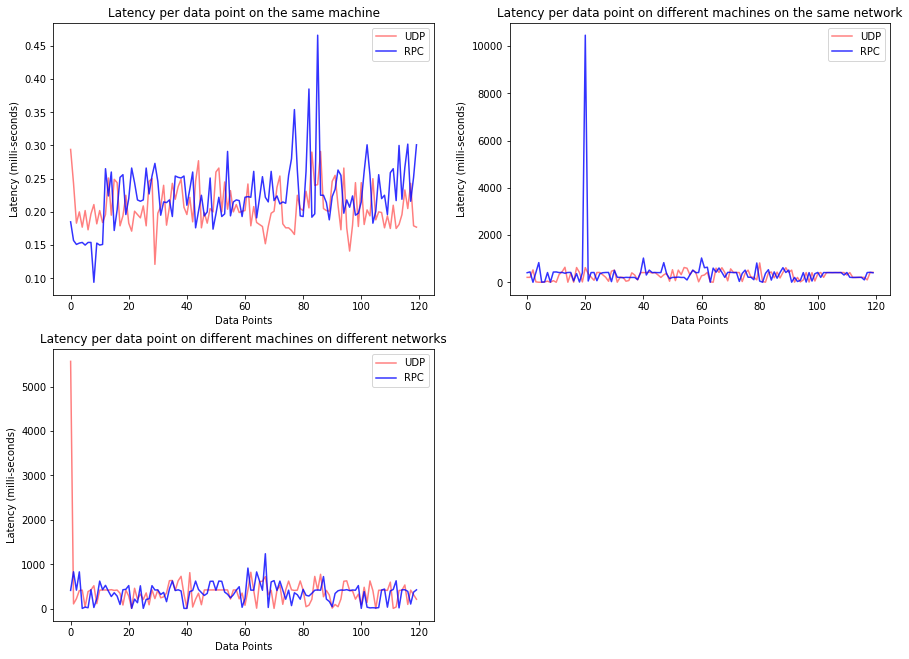

In [7]:
fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(range(len(udp_sameM_latencies)), udp_sameM_latencies, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_sameM_latencies)), rpc_sameM_latencies, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Latency (milli-seconds)')
plt.title('Latency per data point on the same machine')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.plot(range(len(udp_diffM_sameN_latencies)), udp_diffM_sameN_latencies, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_sameN_latencies)), rpc_diffM_sameN_latencies, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Latency (milli-seconds)')
plt.title('Latency per data point on different machines on the same network')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.plot(range(len(udp_diffM_diffN_latencies)), udp_diffM_diffN_latencies, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_diffN_latencies)), rpc_diffM_diffN_latencies, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Latency (milli-seconds)')
plt.title('Latency per data point on different machines on different networks')
plt.legend(loc="upper right")

plt.show()

### UDP on the same machine

* The average latency for UDP communication is {{round(np.mean(udp_sameM_latencies),3)}} milli-seconds.
* The standard deviation across latencies for UDP communication is {{round(np.std(udp_sameM_latencies),3)}} milli-seconds.

### RPC on the same machine

* The average latency for RPC communication on the same machine is {{round(np.mean(rpc_sameM_latencies),3)}} milli-seconds.
* The standard deviation across latencies for RPC communication on the same machine is {{round(np.std(rpc_sameM_latencies),3)}} milli-seconds.

### UDP on different machines on the same network

* The average latency for UDP communication  is {{round(np.mean(udp_diffM_sameN_latencies),3)}} milli-seconds.
* The standard deviation across latencies for UDP communication is {{round(np.std(udp_diffM_sameN_latencies),3)}} milli-seconds.

### RPC on different machines on the same network

* The average latency for RPC communication is {{round(np.mean(rpc_diffM_sameN_latencies),3)}} milli-seconds.
* The standard deviation across latencies for RPC communication is {{round(np.std(rpc_diffM_sameN_latencies),3)}} milli-seconds.

### UDP on different machines on different networks

* The average latency for UDP communication  is {{round(np.mean(udp_diffM_diffN_latencies),3)}} milli-seconds.
* The standard deviation across latencies for UDP communication is {{round(np.std(udp_diffM_diffN_latencies),3)}} milli-seconds.

### RPC on different machines on different networks

* The average latency for RPC communication is {{round(np.mean(rpc_diffM_diffN_latencies),3)}} milli-seconds.
* The standard deviation across latencies for RPC communication is {{round(np.std(rpc_diffM_diffN_latencies),3)}} milli-seconds.

# Question 2

# Question 3

In [8]:
def offset_delays(dataFrame):
    delays = []
    offsets = []
    for _,step in dataFrame.iterrows():
        ti_3 = datetime.strptime(step['Client_Send'], '%H:%M:%S.%f')
        ti_2 = datetime.strptime(step['Server_Receive'], '%H:%M:%S.%f')
        ti_1 = datetime.strptime(step['Server_Send'], '%H:%M:%S.%f')
        ti_0 = datetime.strptime(step['Client_Receive'], '%H:%M:%S.%f')
        delay = (ti_2 - ti_3) + (ti_0 - ti_1)
        offset = ((ti_2 - ti_3) - (ti_0 - ti_1))/2.0
        delays.append(delay.total_seconds())
        offsets.append(offset.total_seconds())
    return np.array(delays)*10**6, np.array(offsets)*10**3

In [9]:
udp_sameM_delay, udp_sameM_offset = offset_delays(udp_sameM)
rpc_sameM_delay, rpc_sameM_offset = offset_delays(rpc_sameM)

udp_diffM_sameN_delay, udp_diffM_sameN_offset = offset_delays(udp_diffM_sameN)
rpc_diffM_sameN_delay, rpc_diffM_sameN_offset = offset_delays(rpc_diffM_sameN)

udp_diffM_diffN_delay, udp_diffM_diffN_offset = offset_delays(udp_diffM_diffN)
rpc_diffM_diffN_delay, rpc_diffM_diffN_offset = offset_delays(rpc_diffM_diffN)

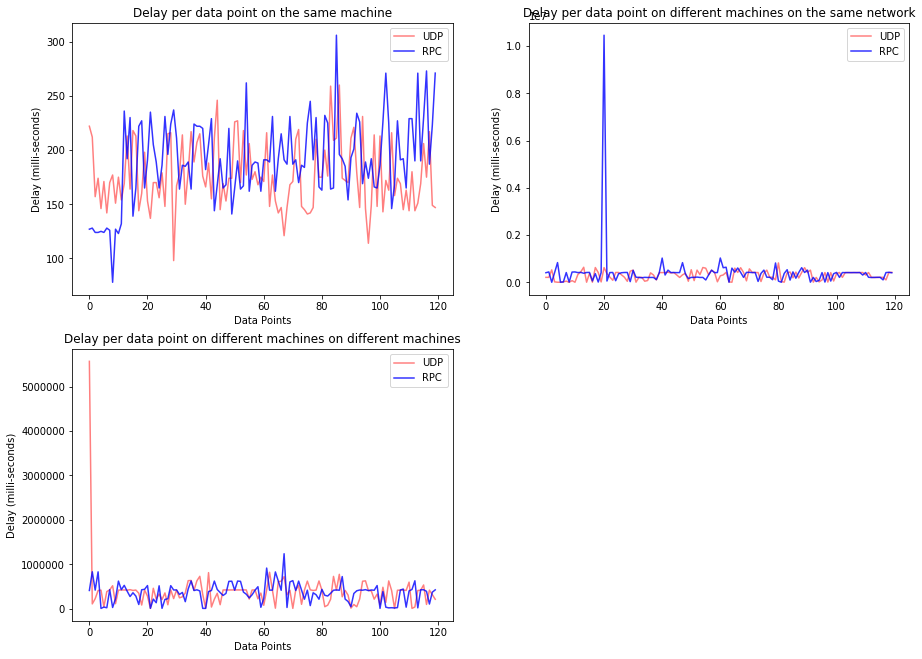

In [10]:
fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(range(len(udp_sameM_delay)), udp_sameM_delay, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_sameM_delay)), rpc_sameM_delay, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Delay (milli-seconds)')
plt.title('Delay per data point on the same machine')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.plot(range(len(udp_diffM_sameN_delay)), udp_diffM_sameN_delay, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_sameN_delay)), rpc_diffM_sameN_delay, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Delay (milli-seconds)')
plt.title('Delay per data point on different machines on the same network')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.plot(range(len(udp_diffM_diffN_delay)), udp_diffM_diffN_delay, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_diffN_delay)), rpc_diffM_diffN_delay, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Delay (milli-seconds)')
plt.title('Delay per data point on different machines on different machines')
plt.legend(loc="upper right")

plt.show()

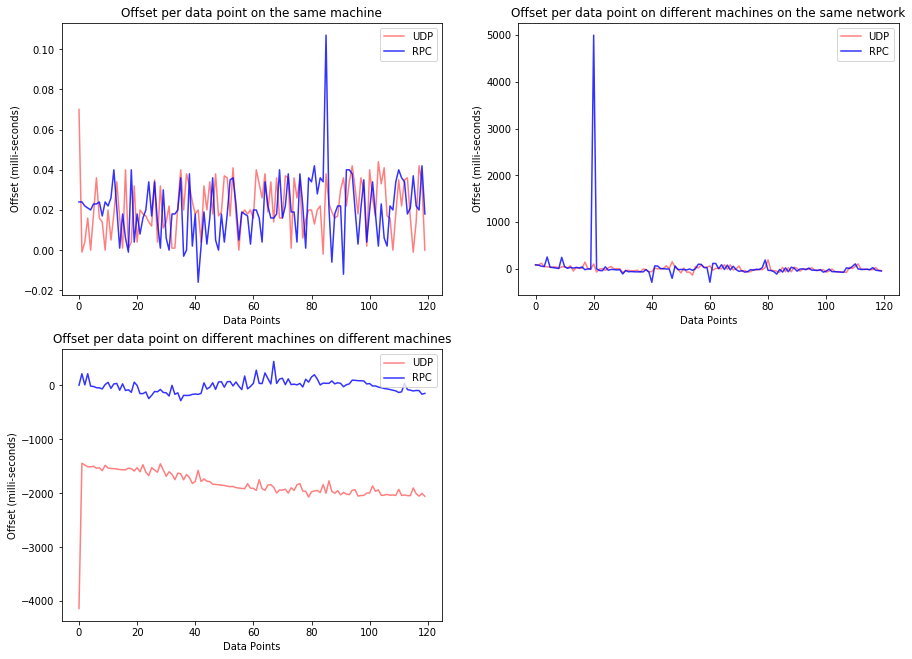

In [11]:
fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(range(len(udp_sameM_offset)), udp_sameM_offset, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_sameM_offset)), rpc_sameM_offset, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Offset (milli-seconds)')
plt.title('Offset per data point on the same machine')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.plot(range(len(udp_diffM_sameN_offset)), udp_diffM_sameN_offset, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_sameN_offset)), rpc_diffM_sameN_offset, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Offset (milli-seconds)')
plt.title('Offset per data point on different machines on the same network')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.plot(range(len(udp_diffM_diffN_offset)), udp_diffM_diffN_offset, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_diffN_offset)), rpc_diffM_diffN_offset, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Offset (milli-seconds)')
plt.title('Offset per data point on different machines on different machines')
plt.legend(loc="upper right")

plt.show()

# Question 4

In [12]:
def crisDiff(dataFrame):
    diffs = []
    for _,step in dataFrame.iterrows():
        ti_3 = datetime.strptime(step['Client_Send'], '%H:%M:%S.%f')
        ti_2 = datetime.strptime(step['Server_Receive'], '%H:%M:%S.%f')
        ti_1 = datetime.strptime(step['Server_Send'], '%H:%M:%S.%f')
        ti_0 = datetime.strptime(step['Client_Receive'], '%H:%M:%S.%f')
        t_new = ti_2 + (ti_0 - ti_3)/2.0
        diff = t_new-ti_0
        diffs.append(diff.total_seconds())
    return np.array(diffs)*10**3

In [13]:
udp_sameM_diff = crisDiff(udp_sameM)
rpc_sameM_diff = crisDiff(rpc_sameM)

udp_diffM_sameN_diff = crisDiff(udp_diffM_sameN)
rpc_diffM_sameN_diff = crisDiff(rpc_diffM_sameN)

udp_diffM_diffN_diff = crisDiff(udp_diffM_diffN)
rpc_diffM_diffN_diff = crisDiff(rpc_diffM_diffN)

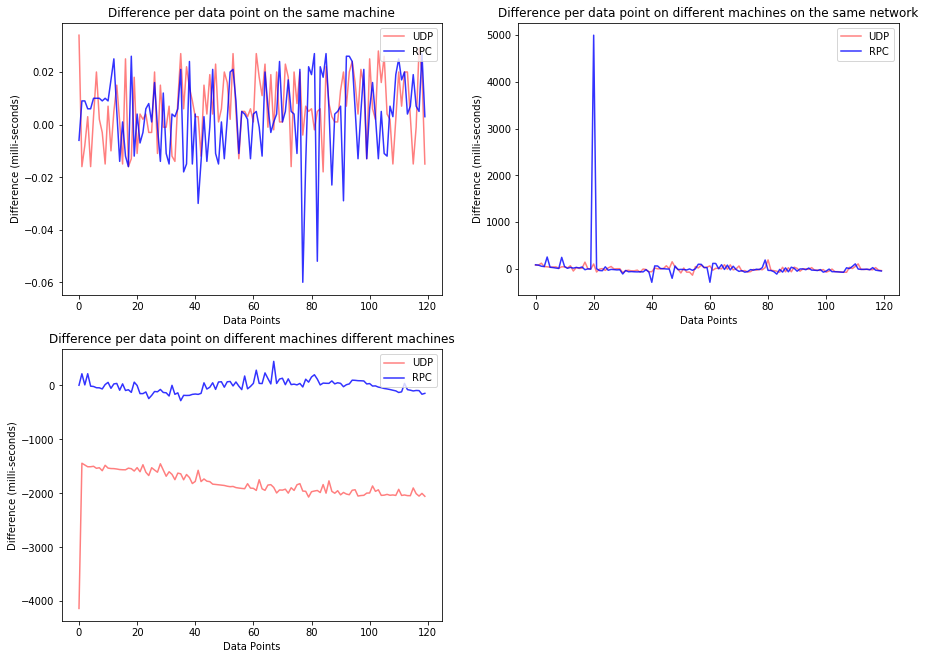

In [14]:
fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(range(len(udp_sameM_diff)), udp_sameM_diff, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_sameM_diff)), rpc_sameM_diff, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Difference (milli-seconds)')
plt.title('Difference per data point on the same machine')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.plot(range(len(udp_diffM_sameN_diff)), udp_diffM_sameN_diff, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_sameN_diff)), rpc_diffM_sameN_diff, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Difference (milli-seconds)')
plt.title('Difference per data point on different machines on the same network')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.plot(range(len(udp_diffM_diffN_diff)), udp_diffM_diffN_diff, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_diffN_diff)), rpc_diffM_diffN_diff, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Difference (milli-seconds)')
plt.title('Difference per data point on different machines different machines')
plt.legend(loc="upper right")

plt.show()